# Boston Housing Price
A regression example.\
Predict the *median price of homes* in a given Boston suburb in the mid-1970s, given the crime rate, the local property tax rate, and so on.

Only 506 samples, split into 404 training samples and 102 test samples. 13 features, and each feature has a different numerical range. For example, feature One takes values between 0 and 1; feature Two takes values between 1 and 12...


Deep Learning with Python by Francois Chollet

In [1]:
from keras.datasets import boston_housing

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

## Preparing the data
Need to normalize the heterogeneous data.\
The feature should be centered around 0 and has a unit standard deviation.

In [3]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## Build the network
The network ends with a single unit and no activation (ie. a linear layer). This is a typica lsetup for scalar regression (a regression where you're trying to predict a single continuous value).

Monitoring the metric: mean absolute error (MAE).

In [12]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

## Validating using K-fold validation
Because there are few samples, splitting them into training, validation, and testing sets is not a good idea.\
Save the metrics for each epoch and for each fold.

In [14]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i+1, '/',k)
    [kstrt, kend] = [i*num_val_samples, (i+1)*num_val_samples]
    
    # Prepares validation data from partition k.
    val_data = train_data[kstrt:kend]
    val_targets = train_targets[kstrt:kend]
    
    # prepares training data from all other partitions.
    training_data = np.concatenate([train_data[:kstrt], 
                                    train_data[kend:]], axis=0)
    training_targets = np.concatenate([train_targets[:kstrt], 
                                       train_targets[kend:]], axis=0)
    
    model = build_model()   # <--------- Build the model
    
    history = model.fit(training_data, training_targets,
                 epochs=num_epochs, batch_size=1, verbose=False)
    
    # save MAE for partition k.
    all_mae_histories.append(history.history['mae'])

processing fold # 1 / 4
processing fold # 2 / 4
processing fold # 3 / 4
processing fold # 4 / 4


In [15]:
# Mean k-fold validation scores
average_mae_history = [ np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs) ]

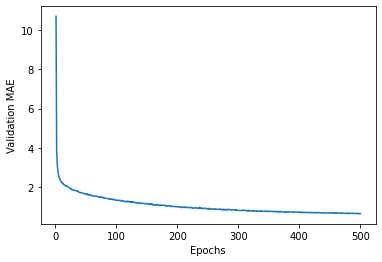

'\nMAE did not hit bottom. More epochs might lead to lower MAE. \nUsually we want to pick an epoch number when MAE is at the lowest.\n'

In [18]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


"""
MAE did not hit bottom. More epochs might lead to lower MAE. 
Usually we want to pick an epoch number when MAE is at the lowest.
"""